# Text Classification challenge

train a deep learning model on the IMDB reviews dataset and classify a set of new reviews as positive(1) or negative(0) using the trained model.

In [2]:
##import the required libraries and APIs

import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [3]:
##load the imdb reviews dataset
data, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMQ8YTE/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMQ8YTE/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMQ8YTE/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Segregating training and testing sets

In [13]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [14]:
##iterate over the train data to extract sentences and labels
for sentence, label in train_data:
  train_sentences.append(sentence.numpy().decode('utf8'))
  train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sentence, label in test_data:
  test_sentences.append(sentence.numpy().decode('utf8'))
  test_labels.append(label.numpy())

In [15]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [17]:
# find the max length of the sentence
# max_length = max(len(line)  for line in train_sentences)
# print(max_length)

13704


In [27]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
oov_token = '<OOV>'
max_length = 120
padding_type = 'post'
truncating_type = 'post'
embedding_dim = 16

In [28]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# training sequences and padding
training_seqs = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_seqs, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# testing sequences and padding
testing_seqs = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_seqs, maxlen=max_length)

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [30]:
num_epochs = 10

# train the model with training and validation set
history = model.fit(training_padded, train_labels,
                    validation_data=(testing_padded, test_labels),
                    epochs=num_epochs)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5108 - accuracy: 0.7673 - val_loss: 0.3531 - val_accuracy: 0.8506
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3068 - accuracy: 0.8733 - val_loss: 0.3281 - val_accuracy: 0.8575
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2509 - accuracy: 0.8986 - val_loss: 0.3397 - val_accuracy: 0.8543
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2169 - accuracy: 0.9174 - val_loss: 0.3649 - val_accuracy: 0.8464
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1906 - accuracy: 0.9290 - val_loss: 0.4009 - val_accuracy: 0.8396
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1712 - accuracy: 0.9384 - val_loss: 0.4337 - val_accuracy: 0.8354
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1547 - accuracy: 0.9456 - val_loss: 0.4785 - val_accuracy: 0.8276
Epoch 

## Visualise the train & validation accuracy and loss

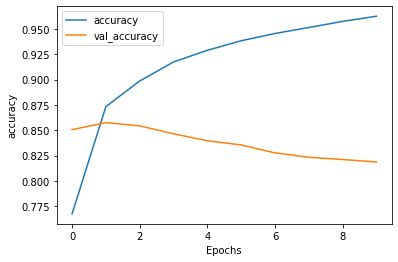

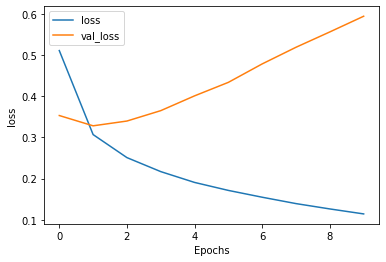

In [32]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

## Classify new reviews

In [33]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, all seven hours of it, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=truncating_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.03979313]
 [0.58049285]]
